In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("Documents/sample.csv")
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price(US$)')

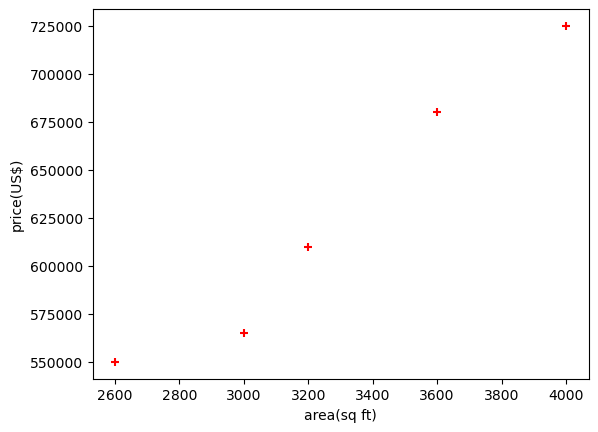

In [3]:
%matplotlib inline
plt.scatter(df.Area,df.Price, color='red',marker='+')
plt.xlabel('area(sq ft)')
plt.ylabel('price(US$)')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['Area']], df['Price'])

LinearRegression()

In [5]:
#reg.coef_


In [6]:
#reg.intercept_

In [7]:
reg.predict([[3300]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
reg.predict([[5000]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [9]:
new_area = pd.read_csv("Documents/area.csv")

In [10]:
new_area

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [11]:
predictions = reg.predict(new_area)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
Feature names seen at fit time, yet now missing:
- Area

  warnings.warn(message, FutureWarning)


In [12]:
predictions

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [13]:
new_area['prices'] = predictions
new_area

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [14]:
new_area.to_csv('predictions.csv')

In [15]:
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


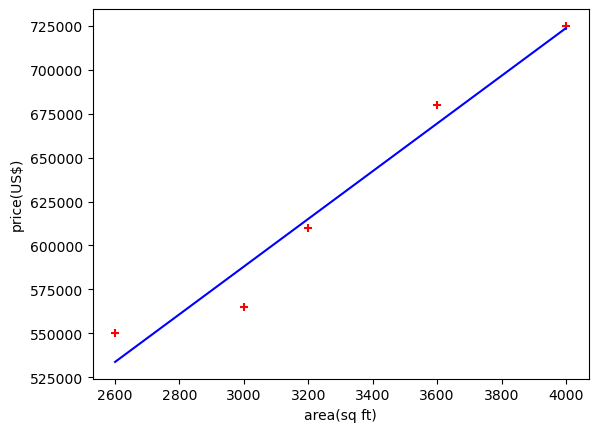

In [16]:
%matplotlib inline
plt.scatter(df.Area,df.Price, color='red',marker='+')
plt.xlabel('area(sq ft)')
plt.ylabel('price(US$)')
plt.plot(df.Area, reg.predict(df[['Area']]),color='blue')

In [17]:
import pickle 

In [21]:
with open('reg_pickle','wb') as f:
    pickle.dump(reg,f)

In [24]:
with open('reg_pickle','rb') as f:
    model = pickle.load(f)

In [25]:
#model object has been created. We can directly use it to run on different programs.

In [27]:
model.predict([[5000]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [28]:
# now doing same task by joblib

In [31]:
import joblib

In [32]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [33]:
joblib_object = joblib.load('model_joblib')

In [35]:
joblib_object.predict([[5000]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])